# **Car Price Predictor Using Machine Learning**

This project has been implemented to fulfill the module completion requirements of EE7209 Machine Learning module.


# **DATA LOADING**

In [1]:
!pip install opendatasets
!pip install pandas

In [2]:
import opendatasets as od
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
od.download("https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: tharushiwitharana
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho


100%|██████████| 292k/292k [00:00<00:00, 24.7MB/s]

In [5]:
data = pd.read_csv('/content/vehicle-dataset-from-cardekho/car data.csv')

In [6]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [7]:
data.shape

(301, 9)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


# **DATA PRE-PROCESSING**

### **CHECKING NULL VALUES**

In [9]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

*There is no any null values in the dataset. Therefore no need to treat them.*

# **EDA**

In [10]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


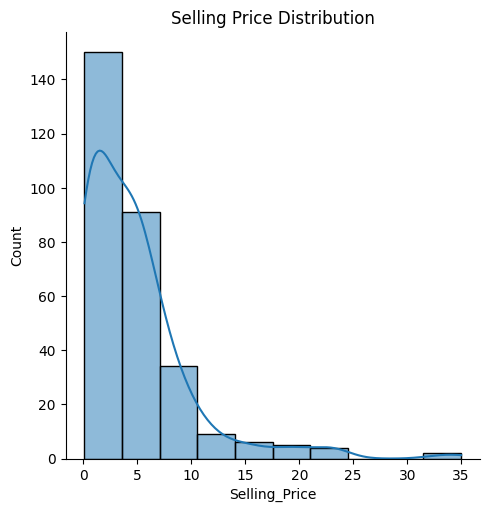

In [11]:
# plotting selling price distribution
sns.displot(data['Selling_Price'], kde=True, bins = 10).set(title = "Selling Price Distribution")
plt.show()

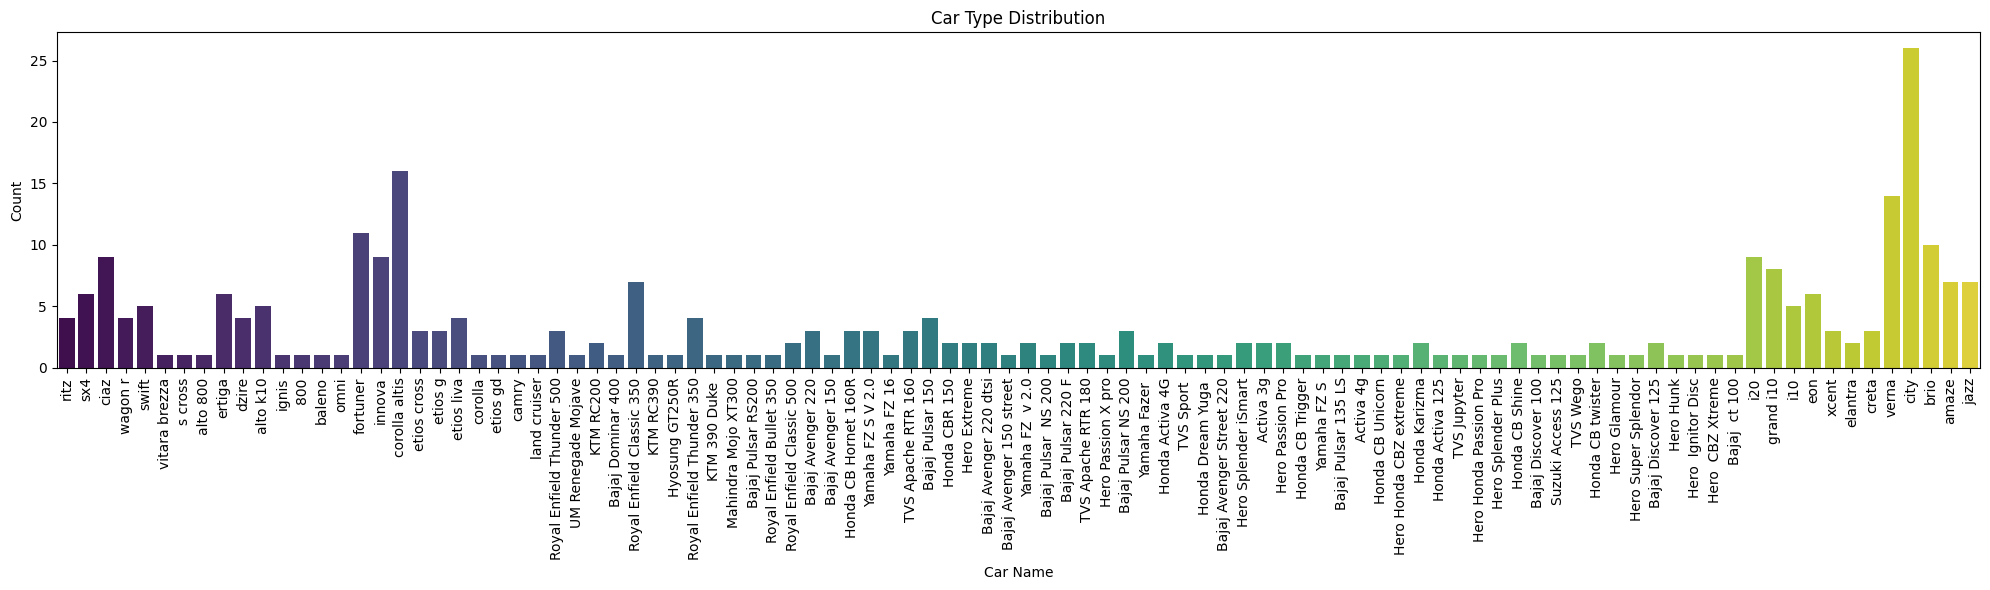

In [12]:
# Check for the Car Tyte distribution

plt.figure(figsize=(20, 6))
sns.countplot(data=data, x='Car_Name', hue=data.Car_Name,palette='viridis')
plt.xticks(rotation=90)

# Set title and labels
plt.title('Car Type Distribution')
plt.xlabel('Car Name')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

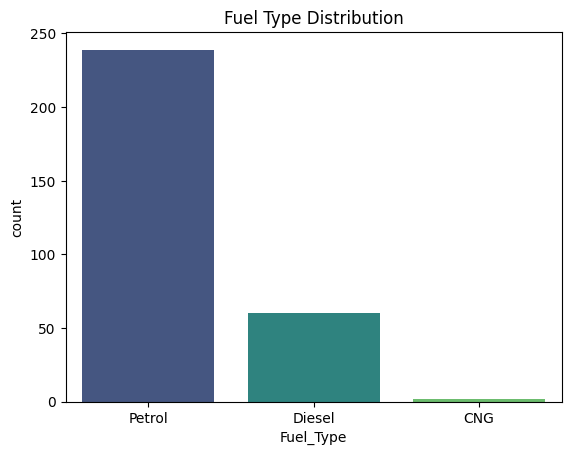

In [13]:
# Check for the Fuel Tyte distribution
sns.countplot(x=data.Fuel_Type,hue=data.Fuel_Type,palette='viridis').set(title = 'Fuel Type Distribution')
plt.show()

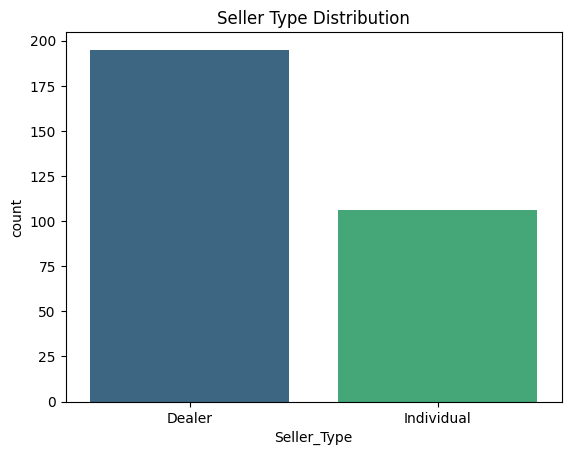

In [14]:
# Check for the seller Tyte distribution
sns.countplot(x=data.Seller_Type,hue=data.Seller_Type,palette='viridis').set(title = 'Seller Type Distribution')
plt.show()

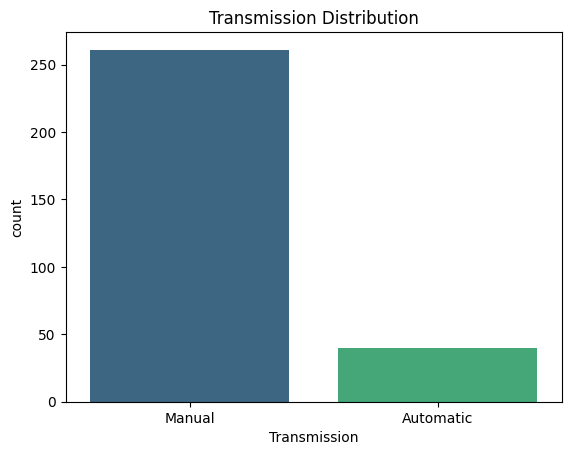

In [15]:
# Check for the seller Tyte distribution
sns.countplot(x=data.Transmission,hue=data.Transmission,palette='viridis').set(title = 'Transmission Distribution')
plt.show()

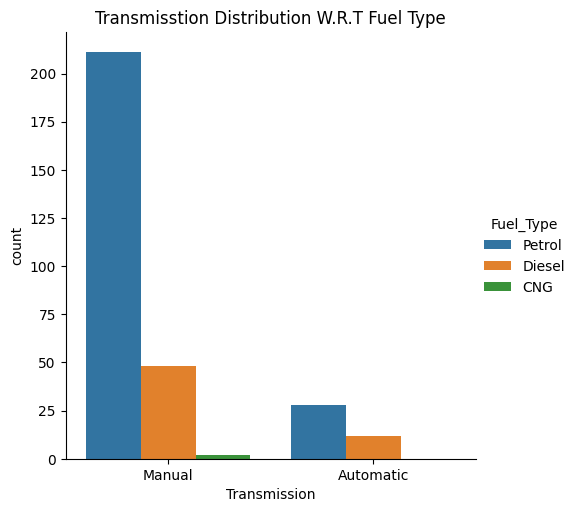

In [16]:
# Check for the transmisstion distribution between fuel type
sns.catplot(x="Transmission", kind="count", hue = 'Fuel_Type', data=data).set(title="Transmisstion Distribution W.R.T Fuel Type");

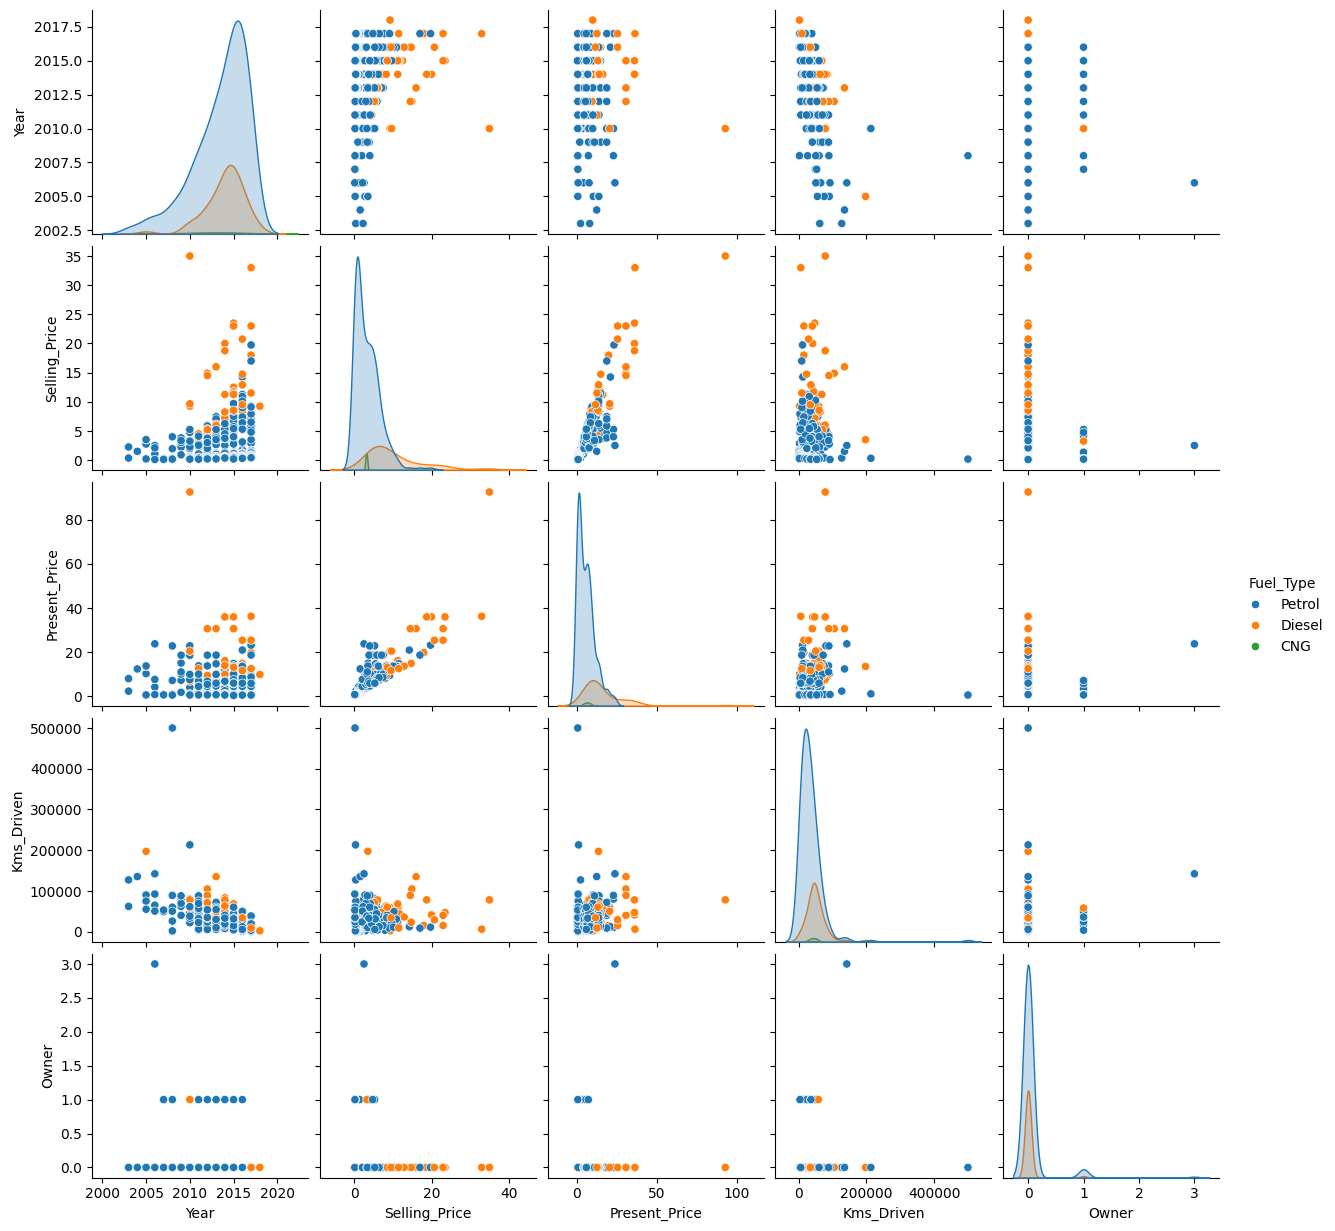

In [17]:
sns.pairplot(data, hue="Fuel_Type");

### **TREATING FOR CATEGORICAL DATA**

In [18]:
#Check for null values
#print the non null count of the features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [19]:
#represent the no of unique values in each feature
for column in data.columns:
    unique_values_count = data[column].nunique()
    print(f"'{column}' \t\t {unique_values_count} ")

'Car_Name' 		 98 
'Year' 		 16 
'Selling_Price' 		 156 
'Present_Price' 		 147 
'Kms_Driven' 		 206 
'Fuel_Type' 		 3 
'Seller_Type' 		 2 
'Transmission' 		 2 
'Owner' 		 3 


In [20]:
#Print the all unique values in feature 'Car_Name'
data['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [21]:
#Print the all unique values in feature 'Fuel_Type'
data['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [22]:
#Print the all unique values in feature 'Seller_Type'
data['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [23]:
#Print the all unique values in feature 'Transmission'
data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

### Appling One-Hot Encoding

In [24]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [25]:
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler

# List the categorial features
categorical_features = ['Fuel_Type', 'Seller_Type','Transmission']

# Define the encoder
transformer = make_column_transformer(
    (
        OneHotEncoder(drop = 'first', handle_unknown = 'ignore', dtype = np.int64, sparse_output=False),
        categorical_features
    )
)

In [26]:
transformed = transformer.fit_transform(data)
transformed_df = pd.DataFrame(transformed, columns= transformer.get_feature_names_out())
transformed_df.index = data.index
tfdata = pd.concat([data, transformed_df], axis = 1)
tfdata.drop(categorical_features, axis=1, inplace=True)
tfdata.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,onehotencoder__Fuel_Type_Diesel,onehotencoder__Fuel_Type_Petrol,onehotencoder__Seller_Type_Individual,onehotencoder__Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,1,0,1
1,sx4,2013,4.75,9.54,43000,0,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,1,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,1,0,1
4,swift,2014,4.60,6.87,42450,0,1,0,0,1


### Appling Label Encoding


In [27]:
data['Car_Name'].value_counts()

Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64

*Due to large no of unique values in 'Car_Name' category,label encodig apply for that*

In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
tfdata['Car_Name'] = le.fit_transform(tfdata['Car_Name'])

In [29]:
tfdata.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,onehotencoder__Fuel_Type_Diesel,onehotencoder__Fuel_Type_Petrol,onehotencoder__Seller_Type_Individual,onehotencoder__Transmission_Manual
0,90,2014,3.35,5.59,27000,0,0,1,0,1
1,93,2013,4.75,9.54,43000,0,1,0,0,1
2,68,2017,7.25,9.85,6900,0,0,1,0,1
3,96,2011,2.85,4.15,5200,0,0,1,0,1
4,92,2014,4.60,6.87,42450,0,1,0,0,1


In [30]:
#Check for the data type of the features
tfdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Car_Name                               301 non-null    int64  
 1   Year                                   301 non-null    int64  
 2   Selling_Price                          301 non-null    float64
 3   Present_Price                          301 non-null    float64
 4   Kms_Driven                             301 non-null    int64  
 5   Owner                                  301 non-null    int64  
 6   onehotencoder__Fuel_Type_Diesel        301 non-null    int64  
 7   onehotencoder__Fuel_Type_Petrol        301 non-null    int64  
 8   onehotencoder__Seller_Type_Individual  301 non-null    int64  
 9   onehotencoder__Transmission_Manual     301 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 23.6 KB


### **CHECKING DUPLICATE VALUES**

In [31]:
#Print duplicate rows in the dataset
tfdata[tfdata.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,onehotencoder__Fuel_Type_Diesel,onehotencoder__Fuel_Type_Petrol,onehotencoder__Seller_Type_Individual,onehotencoder__Transmission_Manual
17,76,2016,7.75,10.79,43000,0,1,0,0,1
93,81,2015,23.00,30.61,40000,0,1,0,0,0


In [32]:
# Drop duplicate rows based on all columns
tfdata.drop_duplicates(inplace=True)

In [33]:
#Print duplicate rows in the dataset
tfdata[tfdata.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,onehotencoder__Fuel_Type_Diesel,onehotencoder__Fuel_Type_Petrol,onehotencoder__Seller_Type_Individual,onehotencoder__Transmission_Manual


*Duplicate values were dropped*

In [34]:
tfdata.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,onehotencoder__Fuel_Type_Diesel,onehotencoder__Fuel_Type_Petrol,onehotencoder__Seller_Type_Individual,onehotencoder__Transmission_Manual
0,90,2014,3.35,5.59,27000,0,0,1,0,1
1,93,2013,4.75,9.54,43000,0,1,0,0,1
2,68,2017,7.25,9.85,6900,0,0,1,0,1
3,96,2011,2.85,4.15,5200,0,0,1,0,1
4,92,2014,4.60,6.87,42450,0,1,0,0,1


### **TREATING FOR OUTLIERS**

*Whereas tree-based algorithms like decision tree, random forest etc. don’t get affected by outliers as much*

### **FEATURE SCALLING**

*In this project we are going to use tree based algorithms. Those are Desition tree and Random forest. Hence feature scallling is not applicable.*

# **FEATURE SELECTION**

### **APPLING CORRELATION MATRIX**

In [35]:
correlation_matrix = tfdata.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Find highly correlated features
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:  # Adjust the threshold as needed
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

print("\nHighly Correlated Features:")
print(highly_correlated_features)

Correlation Matrix:
                                       Car_Name      Year  Selling_Price  \
Car_Name                               1.000000  0.014713       0.501429   
Year                                   0.014713  1.000000       0.234369   
Selling_Price                          0.501429  0.234369       1.000000   
Present_Price                          0.474856 -0.053563       0.876378   
Kms_Driven                             0.064077 -0.525714       0.028566   
Owner                                 -0.080579 -0.181639      -0.087880   
onehotencoder__Fuel_Type_Diesel        0.350479  0.056469       0.543541   
onehotencoder__Fuel_Type_Petrol       -0.366942 -0.052197      -0.531636   
onehotencoder__Seller_Type_Individual -0.829255 -0.036820      -0.553851   
onehotencoder__Transmission_Manual    -0.055072  0.003434      -0.348869   

                                       Present_Price  Kms_Driven     Owner  \
Car_Name                                    0.474856    0.064077 

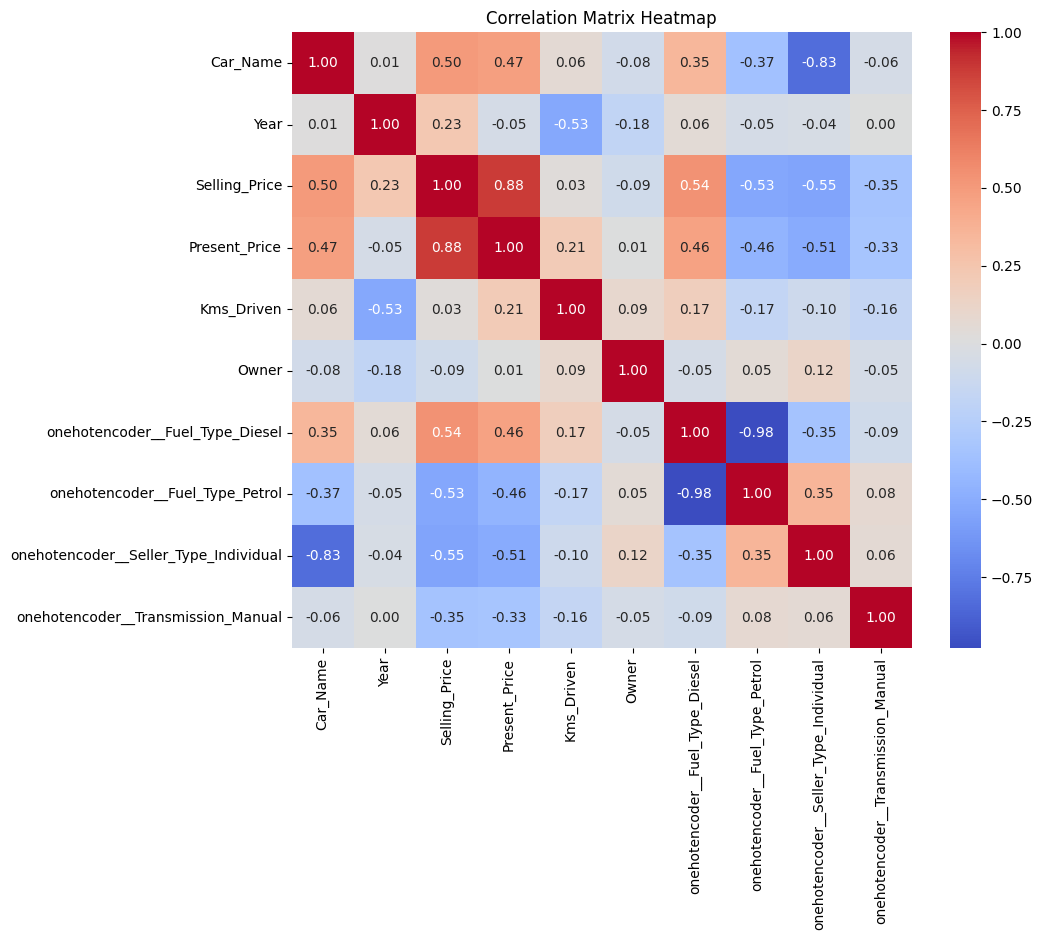

In [36]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add title
plt.title('Correlation Matrix Heatmap')

# Show plot
plt.show()

According to the correlation matrix, we can clearly see that value between target variable called 'Selling_Price' and two features named as 'Kms_Driven' and 'Owner' close to zero.Though it is,  when considering the dataset and the target variable, the feature Kms_Driven still be an important feature because  it contributes significantly to the model's predictive power.And also, 'onehotencoder__Fuel_Type_Petrol','onehotencoder__Seller_Type_Individual' are highly correlated features. Hence we can drop 'onehotencoder__Fuel_Type_Petrol','onehotencoder__Seller_Type_Individual' and 'Owner'.

In [37]:
#Drop the faeture 'onehotencoder__Fuel_Type_Petrol'
tfdata=tfdata.drop('onehotencoder__Fuel_Type_Petrol', axis=1)

In [38]:
#Drop the faeture 'onehotencoder__Seller_Type_Individual'
tfdata=tfdata.drop('onehotencoder__Seller_Type_Individual', axis=1)

In [39]:
#Drop the faeture 'Owner'
tfdata=tfdata.drop('Owner', axis=1)

# **HANDLING IMBALANCED DATASET**

*Here we have selected tree based algorithms which handle imbalaced datasets*

# **TRAIN TEST SPLIT**

In [40]:
#Drop the target variable from the dataset and create new dataset
x = tfdata.drop('Selling_Price', axis=1)
x.tail()

,Car_Name,Year,Present_Price,Kms_Driven,onehotencoder__Fuel_Type_Diesel,onehotencoder__Transmission_Manual
296,69,2016,11.6,33988,1,1
297,66,2015,5.9,60000,0,1
298,69,2009,11.0,87934,0,1
299,69,2017,12.5,9000,1,1
300,66,2016,5.9,5464,0,1


In [41]:
#Create another dataset with target variable
y = tfdata['Selling_Price']
y.tail()

296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, dtype: float64

In [42]:
x.shape

(299, 6)

In [43]:
y.shape

(299,)

In [44]:
#Split the dataset to tarin and testing scenarios
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [45]:
x_train.shape

(209, 6)

In [46]:
x_test.shape

(90, 6)

In [47]:
y_train.shape

(209,)

In [48]:
y_test.shape

(90,)

# **ML MODEL IMPLIMENTATION AND EVALUATION**

### **RANDOM FOREST**

In [49]:
from sklearn.ensemble import RandomForestRegressor

# by reducing the n_essimator value from 50 to 5, mse is reduced
model = RandomForestRegressor(n_estimators=5)
model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=5)

In [50]:
#Create a dataset with predicted target variable
pred = model.predict(x_test)

In [51]:
#Evaluate the performances of the Random Forest
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, pred)

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test, pred)

# Compute Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Compute R-squared (R2) score
r2 = r2_score(y_test, pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)


Mean Absolute Error (MAE): 0.7528666666666666
Mean Squared Error (MSE): 2.2221055555555562
Root Mean Squared Error (RMSE): 1.4906728532966433
R-squared (R2) Score: 0.893432644403151


### **DECISION TREE**

In [52]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train, y_train)


DecisionTreeRegressor()

In [53]:
#Create a dataset with predicted target variable
pred_dt = model.predict(x_test)

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Compute Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, pred_dt)

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(y_test, pred_dt)

# Compute Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Compute R-squared (R2) score
r2 = r2_score(y_test, pred_dt)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)


Mean Absolute Error (MAE): 0.7321111111111112
Mean Squared Error (MSE): 1.4444633333333334
Root Mean Squared Error (RMSE): 1.2018582833817528
R-squared (R2) Score: 0.9307266761900256


# **CROSS VALIDATION**

### Random Forest

In [55]:
from sklearn.model_selection import cross_val_score

### **Hyper Parameter Tuning**

In [56]:
rf= RandomForestRegressor(n_estimators=2)
cross_val_score(rf,x,y,cv=5).mean()

0.14749912197728682

In [57]:
rf= RandomForestRegressor(n_estimators=5)
cross_val_score(rf,x,y,cv=5).mean()

0.03550235633608454

In [58]:
rf= RandomForestRegressor(n_estimators=10)
cross_val_score(rf,x,y,cv=5).mean()

0.41362131213746467

In [59]:
rf= RandomForestRegressor(n_estimators=15)
cross_val_score(rf,x,y,cv=5).mean()

0.18181076523260867

### Desicion Tree

In [60]:
dt= DecisionTreeRegressor()
cross_val_score(dt,x,y,cv=5).mean()

0.14709396131333502